<a href="https://colab.research.google.com/github/Jenn035/SIM_YAC_GUALE_UPSE/blob/main/trabajo%20correciones%20de%20condicones%20de%20frontera%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy  as np
import math


In [205]:
L=10000                 #Longitud total del yacimiento
dx=150                  #espacios entre nodos
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt= numero de días)
DT=10                   # intervalo de tiempo por día
K=50                    #Permeabilidad MD
por=0.2                 #porosidad
vis=1 # centipoise      #viscosidad
Beta=1
CompTotal=1**(-6) #ps1-1 #compresibilidad total
A=200000#ft^2           #area de yacimiento




In [206]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2) #por lo general eta es < que 0.5 para que el sistema sea estable
Eta

0.1111111111111111

In [207]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):    # definiciones de variables de la ecuación explicita
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)
#corrección de condicion de frontera de dirichlet generalmente se la usa en la frontera izquierda
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) # se edito mas 2. Matriz que guarda todo los resultados, es de acuerdo a las dimensiones del total de número de tiempos (Filas t numero de iteraciones ) por el total número de nodos(columnas)



In [208]:
#Condiciones iniciales
Pyac=1000                 # presion de yacimiento
Piz=500                   #presion frontera izquierda psi
Pder=0                    # presion frontera derecha psi
Pin=np.ones((L//dx)+2)    # la corrección de condiciones de frontera es añadir dos nodos uno por extremo, es por esta razon que sumamos 2
Pres=np.zeros((L//dx)+2)  # vector vacio zeros que representa las condiciones iniciales.(cantidad de nodos de la matriz+2) creación de una matriz vacia con las mismas dimensiones de la matriz de donde se guardara todo los resultados
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac              ## definición para obtener las demas celdas de la primera colulmna de la matriz sin contar los extremos
Pin[0]=2*Piz-Pin[1]       # Presión0 corregida esigual a dos veces de la presion de la izquierda menos la presión pinicial de 1
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2] #presión final es igual a  a dos veces la presión de la derecha menos la presión de la anterior que seria la longitud  de Pin menos 2

Pin.shape

(68,)

In [209]:
len(Pin)
Pexplicita.shape


(10000, 68)

In [210]:
t=DT                              # Tiempo que ha tarnscurrido despues del tiempo=0
Pexplicita[0]=Pin                 #presion explicita de la PRIMERA fila cero va ser igual a la presion inicial /le da el valor inicial a la fila cero
while t<Tiempo:                   # Creación del ciclo while es en base al tiempo (llenará desde la fila 2 hasta la fila 5)
  for i in range(0,len(Pin)-1):   # Ciclo For es en base al espacio,este codigo indica toda la fila de condiciones iniciales
    if i==0:                       #cuando i vale cero nos referimos al primer nodo izq, de la fila t=0 condicones iniciales
      Pres[i]=2*Piz-Pin[1]        #se edito por las correcciones dirichlet de frontera, nueva ecuac# # Presión de resultado evaluado en i va ser la misma presion de la condición inicial
    elif i==len(Pin)-1:            #representa el ultimo nodo (fila lado derecho) que es la longitud del vector de la fila t=0 de las condiciones iniciales
      Pres[i]=2*Pder-Pin[len(Pin)-2]  #se edito##La presion de resultado es igual a la presion inicial del ultimo nodo final derecho añadido un nodo t=0
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)  #llamamos a la función este codigo de presion de resultado nos ayuda a obtener los siguientes nodos(i) de en medio de la fila de dt, y se repite el ciclo para las siguientes dt
  Pexplicita[t//DT]=Pres           #MATRIZ de solucion o DE RESULTADOS Los valores calculados de los triangulos se guardaran en la matriz de resultados,tiempo/delta t obtenemos el numero de iteraciones o indices de cada fila/A MEDIDA QUE VAMOS AUMENTANDO EL DT ES IGUAL A LA PRESION CALCULAD
  t=t+DT                           #este codigo ayudara que las siguientes filas de dt en este caso 3dt en adelante y las siguientes iteraciones se vayan calculando
  Pin=Pres                         #la presion inicial cambia a medida que vamos llenano los triangulos


In [211]:
#Esquema Implicito se resuelve con un sistemas de ecuaciones,una de las caracteristica es el tamaño de la matriz diagonal depende de los triangulos que son ecuaciones lineales al mismo tiempo tenemos incognitas
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #primero se crea la matriz q va obtner los resultados las dimensiones de la matriz son (tiempo/DT,L/DX), adicional se aumneto dos nodos a los extremos

Pin=np.ones((L//dx)+2) #vector de presiones iniciales (es cantidad de nodos y los datos están con unos)
Pres=np.zeros((L//dx)+2) #VECTOR INICIAL
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2 #edito# #¿COMO SE CALCULA EL NUMERO DE NODOS L//dx
Matriz_resolucion=np.zeros([N-2,N-2]) #matriz para resolver el sistema de ecuaciones ¿que dimensiones va tener? N-2 FILAS, Y N-2 COLUMNAS Y SON IGUALES PORQUE ES UNA MATRIZ CUADRADA


In [212]:
#LLENAMOS LA MATRIZ DE RESULTADO ESTO ES PARA UN SOLO CICLO / esta matriz de resolucion es solo para calcular el sistema de ecuaciones
for i in range(N-2):              #INDICES I=J NO SE COLOCO J XQ ES IGUAL A i son valores de la diagonal
  Matriz_resolucion[i,i]=1+2*Eta  #llena los valores de la diagonal# va [i,i] porq es solo PARA UN SOLO CICLO xq va i,i xq en la diagonal los indice de la matriz son iguales y d ahi llenamos toda la diagonal i es igual a j por eso le colocamos i,i , correr por fila fila de esta matriz y va exactamente con la misma columna equivalente (giagonal)y colocar el valor 1+2eta
  if i>0:                           # tenemos si i es mayor a cero. el primero no tiene valor de la diagonal es por eso q i tiene q ser mayor a 0 porque la siguiente fila q es 1 ahi si hay valor de diagonal que seria - lambda
    Matriz_resolucion[i,i-1]=-Eta  #tenemos que el valor de la matriz de resolución de la fila i y columna i-1 es igual -eta con este codigo vamos a llenar todas las casillas a la izquierda de la diagonal, aqui no vamos a tener - lambda en la primera fila de la izquierda de la diagonal
  if i<(N-3):                       #a todos los valores cuando i sea menor a n-3 le ponemos un valor a la derecha , en la fila tenemos n-2 entonces la siguiente fila es n-3, matriz n-2 por n-2 pero la ultima fila no tiene valor a la derecha y solo vamos a poner ese menos eta a la derecha de la diagonal pero hasta la fila antes
    Matriz_resolucion[i,i+1]=-Eta   #ahora llenamos las casillas de la parte derecha de la diagonal





In [213]:
Matriz_resolucion2.shape


(66, 66)

In [214]:
Matriz_resolucion2=np.zeros_like(Matriz_resolucion) # Creación de la matriz con la condiciones de dirichlet
for i in range(0,N-3):
  Matriz_resolucion2[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion2[i,i-1]=-Eta
  if i<(N-4):
    Matriz_resolucion2[i,i+1]=-Eta

Matriz_resolucion2[1,1] =1+3*Eta
Matriz_resolucion2[N-3,N-3] =1+Eta
Pin[1]=2*Eta*Piz


In [215]:
Pin.shape
Matriz_resolucion2.shape

(66, 66)

In [216]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])

In [217]:
Pcal

array([ 167.83126364,  846.1439    ,  985.89553639,  998.70700028,
        999.88146672,  999.98913369,  999.99900385,  999.99990868,
        999.99999163,  999.99999923,  999.99999993,  999.99999999,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        ,  999.99999996,
        999.99999954,  999.99999501,  999.99994559,  999.99940

In [218]:
Pder

0

In [219]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([ 500.        ,  167.83126364,  846.1439    ,  985.89553639,
        998.70700028,  999.88146672,  999.98913369,  999.99900385,
        999.99990868,  999.99999163,  999.99999923,  999.99999993,
        999.99999999, 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
        999.99999996,  999.99999954,  999.99999501,  999.99994

In [220]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

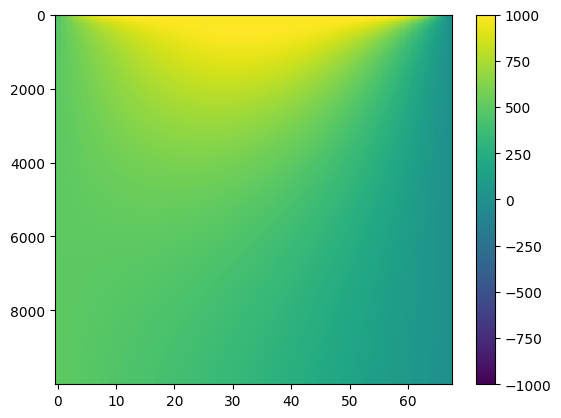

In [221]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

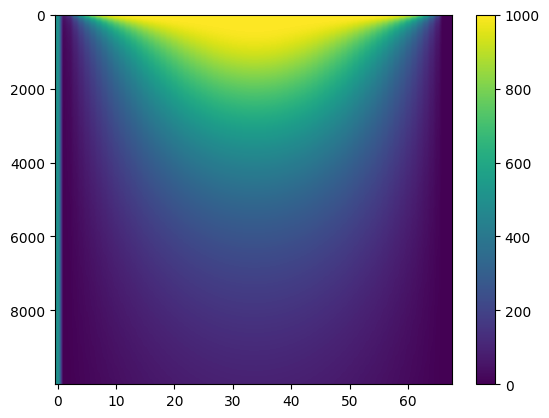

In [222]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()